## Conjunto de dados de compradores de bicicletas 

Este conjunto de dados contém detalhes de 1000 usuários de diferentes origens e se eles compram ou não uma bicicleta.

### Features
- ID
- Marital Status
- Gender
- Income
- Children
- Education
- Occupation
- Home Owner
- Cars
- Commute Distance
- Region
- Age
- Purchased Bike

## Importação das Bibliotecas

In [1]:
import numpy as np # álgebra linear
import pandas as pd # processamendo de dados


import seaborn as sns # visualização de dados
import matplotlib.pyplot as plt # visualização de dados

from sklearn import metrics # métricas avaliativas
from sklearn.preprocessing import OneHotEncoder # codificação de dados

from sklearn.model_selection import train_test_split # divisão dos dados em treino/teste

# modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Leitura dos dados

In [2]:
df = pd.read_csv('bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


## Descrição dos dados

In [3]:
print('Linhas: %s\nColunas: %s' % df.shape)

Linhas: 1000
Colunas: 13


In [4]:
# algumas colunas possuem dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [5]:
# descrição estatística 
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [6]:
df['Purchased Bike'].value_counts(normalize=True)

No     0.519
Yes    0.481
Name: Purchased Bike, dtype: float64

## Visualização de dados

### Distribuição de frequência da idade e renda

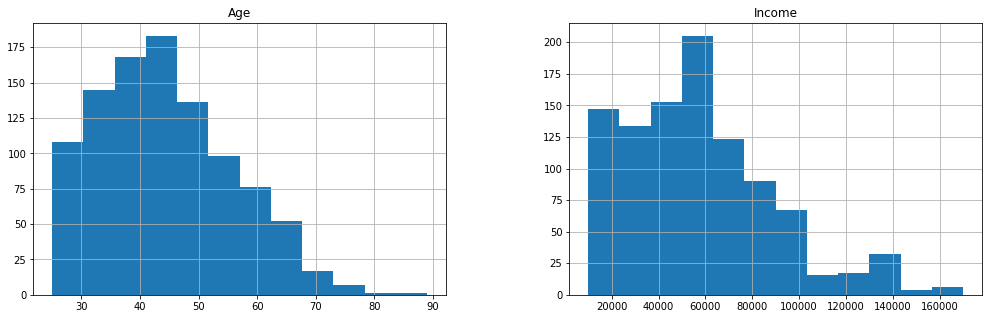

In [7]:
# distribuição de frequência da idade e renda
df[['Age', 'Income']].hist(bins=12, figsize=(17, 5));

### Boxplot

A utilização do gráfico permite avaliar a simetria e distribuição dos dados, e também propicia a perspectiva
visual da presença ou não de dados discrepantes (outliers).

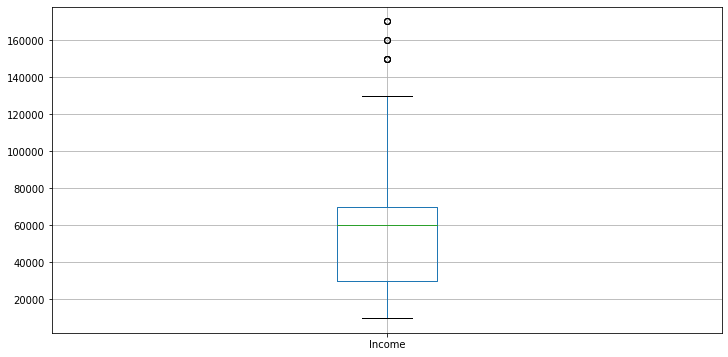

In [8]:
df[['Income']].boxplot(figsize=(12,6));

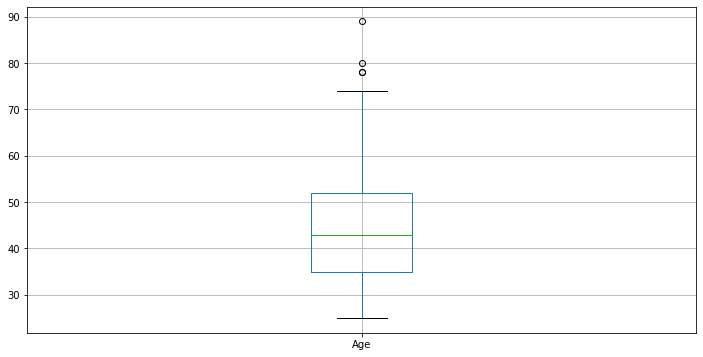

In [9]:
df[['Age']].boxplot(figsize=(12,6));

### Gráficos de Barras agrupadas

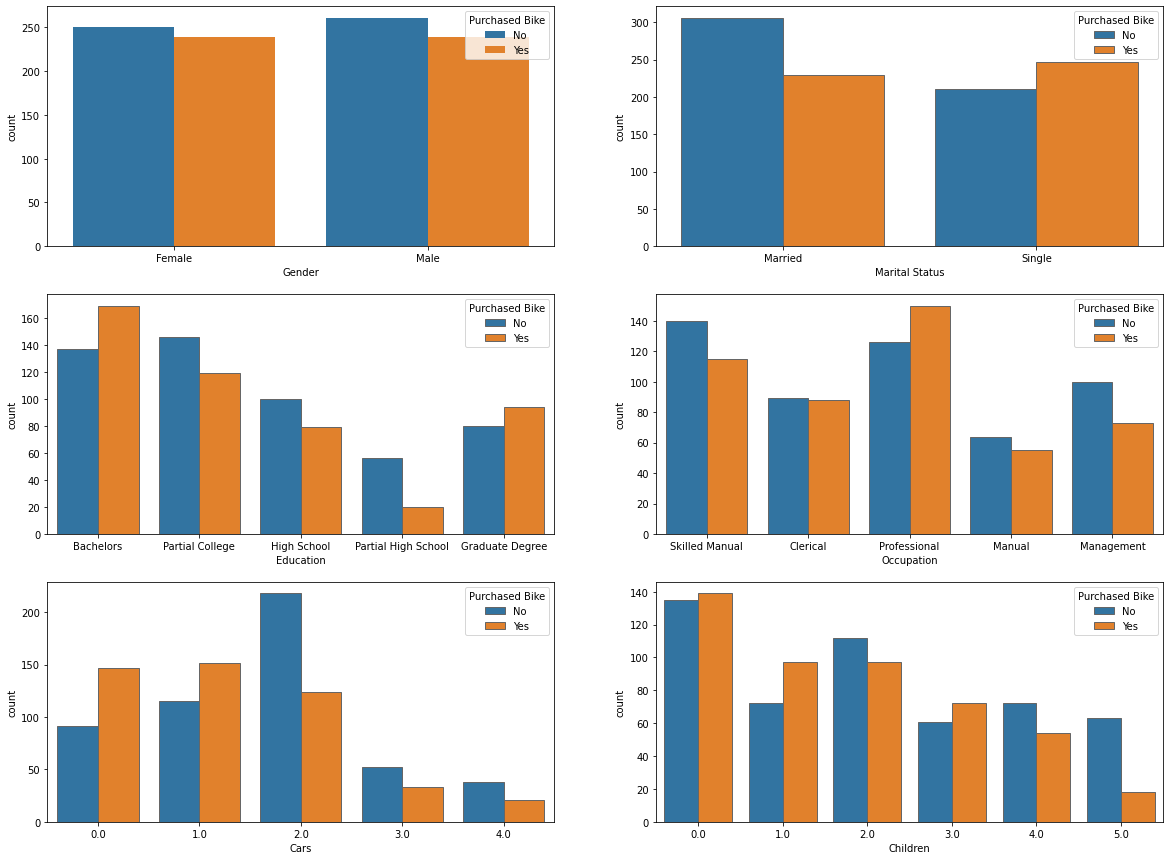

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
sns.countplot(x='Gender', hue='Purchased Bike',data=df,ax=ax1);
sns.countplot(x='Marital Status', hue='Purchased Bike',data=df, ax=ax2, edgecolor='0.4');
sns.countplot(x='Education', hue='Purchased Bike',data=df,ax=ax3, edgecolor='0.4');
sns.countplot(x='Occupation', hue='Purchased Bike',data=df, ax=ax4, edgecolor='0.4');
sns.countplot(x='Cars', hue='Purchased Bike',data=df, ax=ax5, edgecolor='0.4');
sns.countplot(x='Children', hue='Purchased Bike',data=df, ax=ax6, edgecolor='0.4');

## Transformação de dados

### Tratamento de Missing Values

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True) 
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Cars'].fillna(df['Cars'].median(), inplace=True)
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Home Owner'].fillna(df['Home Owner'].mode()[0], inplace=True)
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

### Alteração do tipo

In [12]:
df['Children'] = df['Children'].astype('int')
df['Cars'] = df['Cars'].astype('int')
df['Age'] = df['Age'].astype('int')

### Encoding

In [13]:
map_rep = {'Gender' : {'Female' : 0, 'Male' : 1},
'Purchased Bike' : {'No' : 0, 'Yes' : 1},
'Marital Status' : {'Single' : 0, 'Married' : 1 },
'Home Owner' : {'No' : 0, 'Yes' : 1},
'Education' : {'Partial High School' : 0, 'High School' : 1, 'Partial College' : 2, 'Bachelors' : 3, 'Graduate Degree' : 4},
'Commute Distance' : {'0-1 Miles' : 4, '1-2 Miles' : 3, '2-5 Miles' : 2, '5-10 Miles' : 1, '10+ Miles' : 0 }
}

df.replace(map_rep, inplace=True)
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000.0,1,3,Skilled Manual,1,0,4,Europe,42,0
1,24107,1,1,30000.0,3,2,Clerical,1,1,4,Europe,43,0
2,14177,1,1,80000.0,5,2,Professional,0,2,2,Europe,60,0
3,24381,0,1,70000.0,0,3,Professional,1,1,1,Pacific,41,1
4,25597,0,1,30000.0,0,3,Clerical,0,0,4,Europe,36,1


### One Hot Encoding

In [14]:
x_region = OneHotEncoder().fit_transform(df['Region'].values.reshape(-1, 1)).toarray()
x_ocuppation = OneHotEncoder().fit_transform(df['Occupation'].values.reshape(-1, 1)).toarray()
x_region, x_ocuppation

df = pd.concat([df, pd.DataFrame(x_region, columns=['Region_1', 'Region_2', 'Region_3']), 
               pd.DataFrame(x_ocuppation, columns=['Occu_1', 'Occu_2', 'Occu_3', 'Occu_4', 'Occu_5'])], axis=1)
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Region_1,Region_2,Region_3,Occu_1,Occu_2,Occu_3,Occu_4,Occu_5
0,12496,1,0,40000.0,1,3,Skilled Manual,1,0,4,...,42,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24107,1,1,30000.0,3,2,Clerical,1,1,4,...,43,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,14177,1,1,80000.0,5,2,Professional,0,2,2,...,60,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24381,0,1,70000.0,0,3,Professional,1,1,1,...,41,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,25597,0,1,30000.0,0,3,Clerical,0,0,4,...,36,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Remoção de Features

In [15]:
df= df.drop(['ID', 'Region', 'Occupation'], axis=1)

### Correlação

In [16]:
corr_matriz = df.iloc[:, :10].corr()

corr_matriz['Purchased Bike'].sort_values(ascending=False)

Purchased Bike      1.000000
Commute Distance    0.141468
Education           0.140758
Income              0.047483
Gender             -0.015179
Home Owner         -0.017103
Age                -0.106472
Marital Status     -0.107264
Children           -0.121342
Cars               -0.198774
Name: Purchased Bike, dtype: float64

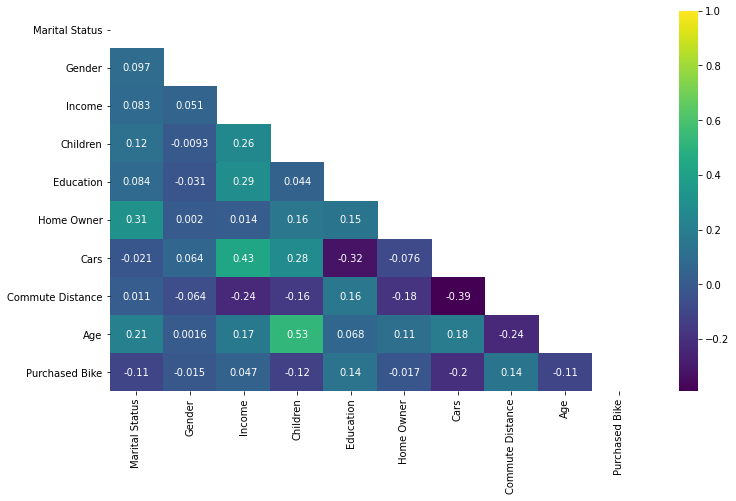

In [17]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matriz, mask=np.triu(corr_matriz), annot=True, cmap='viridis');

### Divisão dos dados em dados de treino e teste

In [18]:
y = df['Purchased Bike']
X = df.drop(['Purchased Bike'], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37, stratify=y)

## Aplicação de escalonamentos

### MinMax Scaler (Normalização)
O dimensionamento min-max comprime (ou alonga) todos os recursos e deixa os valores dentro do intervalo de [0, 1].

A fórmula para escala min-max é:

$$ x = \frac{x - min(x)}{max(x) - min(x)} $$

In [20]:
X_train_mm =  (X_train - X_train.min())/(X_train.max() - X_train.min())
X_test_mm = (X_test - X_train.min())/(X_train.max() - X_train.min())

### Standardization (Padronização)
O recurso em escala resultante tem uma média de 0 e uma variância de 1.

A Standardization é definida como:
$$ x = \frac{x - mean(x)}{\sigma(x)} $$

In [21]:
X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_train.mean())/X_train.std()

### KNN

In [22]:
scalers = ['Sem escalonamento', 'MinMax', 'Std']

results = []
for scaler in scalers:
    if scaler == 'MinMax':
        X_train_, X_test_ = X_train_mm, X_test_mm
    elif scaler == 'Std':
        X_train_, X_test_ = X_train_std, X_test_std
    else:
        X_train_, X_test_ = X_train, X_test

    for k in list(range(1, 51)):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_, y_train)
        y_pred = knn.predict(X_test_)
        acuracia = metrics.accuracy_score(y_test, y_pred)
        result = { 'k' : k, 'peso': 'sem peso', 'scaler': scaler, 'acuracia': acuracia}
        results.append(result)

        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        knn.fit(X_train_, y_train)
        y_pred = knn.predict(X_test_)
        acuracia = metrics.accuracy_score(y_test, y_pred)
        result = { 'k' : k, 'peso': 'distancia', 'scaler': scaler, 'acuracia': acuracia}
        results.append(result)

## Resultados

In [23]:
df_r = pd.DataFrame(results)

df_r.nlargest(10, 'acuracia')

,k,peso,scaler,acuracia
285,43,distancia,Std,0.775
263,32,distancia,Std,0.770
161,31,distancia,MinMax,0.760
165,33,distancia,MinMax,0.760
175,38,distancia,MinMax,0.760
179,40,distancia,MinMax,0.760
181,41,distancia,MinMax,0.760
183,42,distancia,MinMax,0.760
185,43,distancia,MinMax,0.760
189,45,distancia,MinMax,0.760


In [24]:
a = df_r[(df_r['peso'] == 'sem peso') & (df_r['scaler'] == 'Sem escalonamento')]
b = df_r[(df_r['peso'] == 'sem peso') & (df_r['scaler'] == 'MinMax')]
c = df_r[(df_r['peso'] == 'sem peso') & (df_r['scaler'] == 'Std')]
d = df_r[(df_r['peso'] == 'distancia') & (df_r['scaler'] == 'Sem escalonamento')]
e = df_r[(df_r['peso'] == 'distancia') & (df_r['scaler'] == 'MinMax')]
f = df_r[(df_r['peso'] == 'distancia') & (df_r['scaler'] == 'Std')]

In [25]:
def func_plot(score, title):   
    plt.figure(figsize=(12, 7))
    plt.plot(range(1, 51), score, color='green', marker='o')
    plt.grid()
    plt.title(f'KNN ({title}) ', fontsize=18)
    plt.xlabel('Número de Vizinhos (K)', fontsize=15)
    #plt.yticks(np.arange(0.45, 0.6, 0.02))
    plt.xticks(np.arange(0, 51, 5))
    plt.ylabel('Acurácia', fontsize=15);

## Visualização
### Resultados sem aplicação de pesos

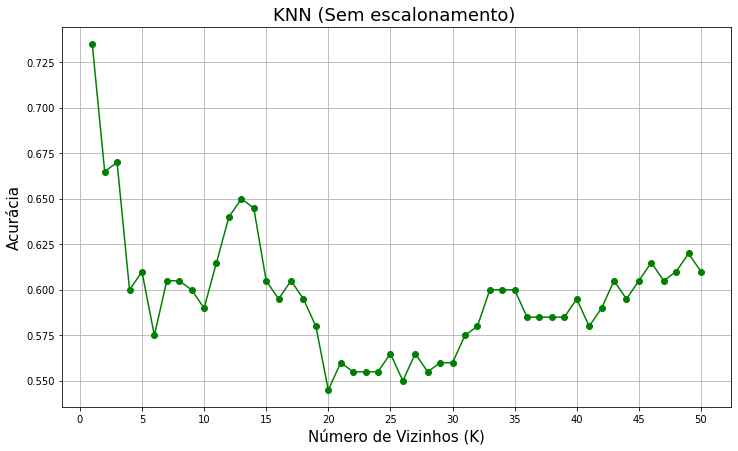

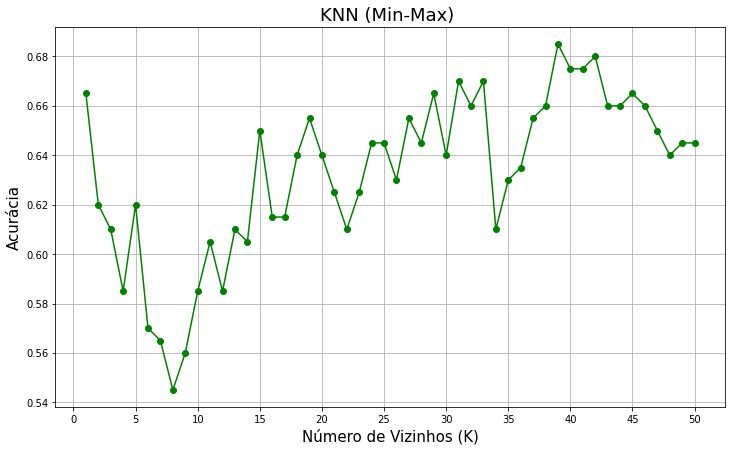

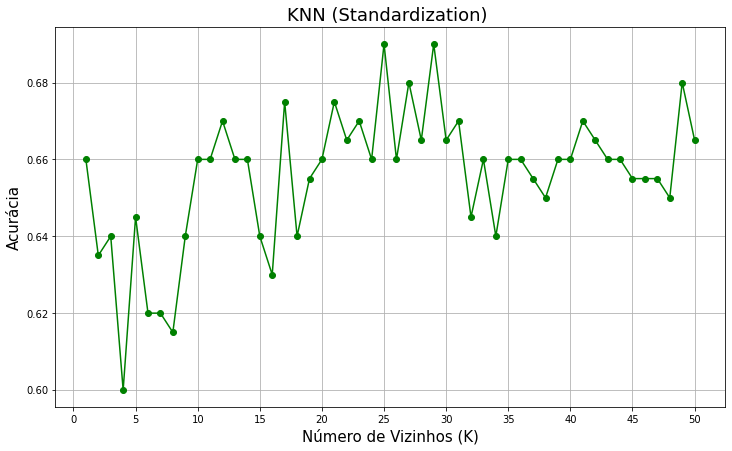

In [26]:
func_plot(a['acuracia'].values, 'Sem escalonamento')
func_plot(b['acuracia'].values, 'Min-Max')
func_plot(c['acuracia'].values, 'Standardization')

### Resultados com aplicação de pesos

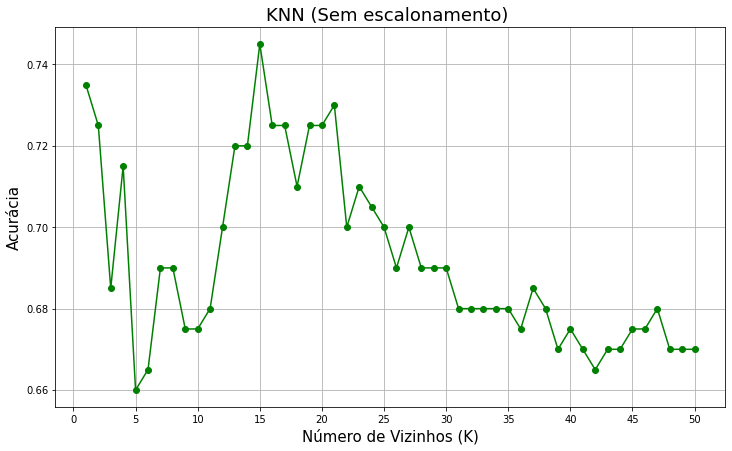

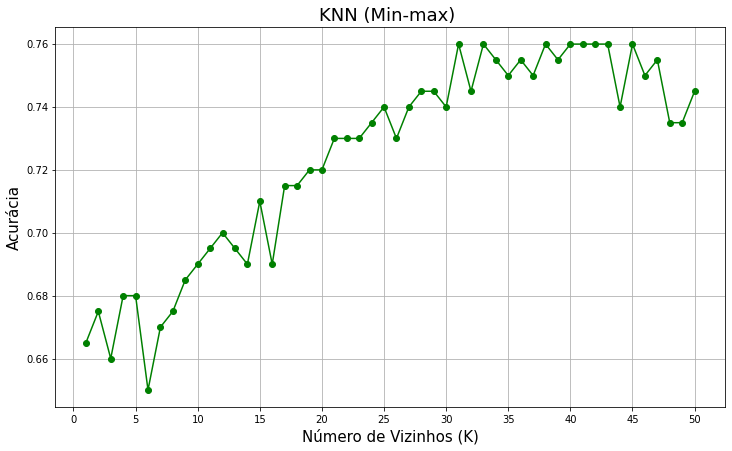

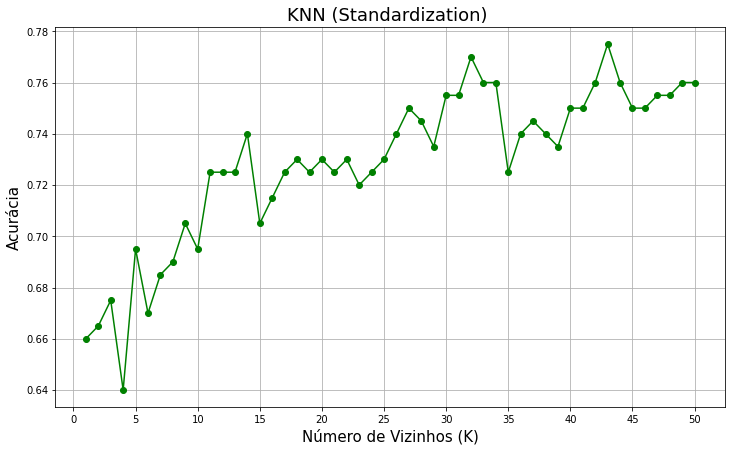

In [27]:
func_plot(d['acuracia'].values, 'Sem escalonamento')
func_plot(e['acuracia'].values, 'Min-max')
func_plot(f['acuracia'].values, 'Standardization')

### Confusion Matrix

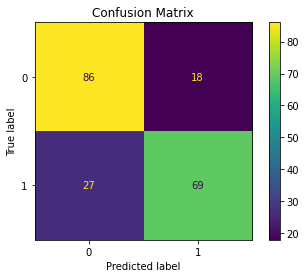

In [28]:
knn = KNeighborsClassifier(n_neighbors=43, weights='distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
metrics.plot_confusion_matrix(knn, X_test_std, y_test);
plt.title('Confusion Matrix');

### Classification report

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       104
           1       0.79      0.72      0.75        96

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



### Aplicação de outros modelos

In [30]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=37)
tree = tree.fit(X_train_std, y_train)
y_pred_tr = tree.predict(X_test_std)

#Random Forest
forest = RandomForestClassifier(random_state=37)
forest.fit(X_train_std, y_train) 
y_pred_fr = forest.predict(X_test_std)

# Logistic Regression
logistic = LogisticRegression(random_state=37)
logistic.fit(X_train_std, y_train)
y_pred_log = logistic.predict(X_test_std)

# SVC
svc = SVC(random_state=37)
svc.fit(X_train_std, y_train)
y_pred_svc = svc.predict(X_test_std)

In [31]:
print(f'Decision Tree:{metrics.accuracy_score(y_test, y_pred_tr)}')
print(f'Random Forest:{metrics.accuracy_score(y_test, y_pred_fr)}')
print(f'Logistic Regression:{metrics.accuracy_score(y_test, y_pred_log)}')
print(f'SVC:{metrics.accuracy_score(y_test, y_pred_svc)}')

Decision Tree:0.705
Random Forest:0.74
Logistic Regression:0.625
SVC:0.715
